In [2]:
import pickle
from natsort import natsorted

basedir = '../../ImageNomer/data/anton/cohorts/BSNIP'
demoname = f'{basedir}/demographics.pkl'

with open(demoname, 'rb') as f:
    demo = pickle.load(f)
    
subs = natsorted(list(demo['Age_cal'].keys()))
print(len(subs))

1244


In [3]:
import numpy as np

task = 'unk'
x = []
y = []
lookup = dict(SZP=0, SZR=1, SADP=2, SADR=3, BPP=4, BPR=5, NC=6)

for sub in subs:
    if demo['DXGROUP_2'][sub] not in lookup.keys():
        continue
    p = np.load(f'{basedir}/fc/{sub}_task-{task}_fc.npy')
    x.append(p)
    y.append(lookup[demo['DXGROUP_2'][sub]])
    
x = np.stack(x)
y = np.array(y).astype('int')

print(x.shape)
print(y.shape)
print(y)

(1244, 34716)
(1244,)
[0 0 6 ... 1 1 3]


In [40]:
from sklearn.cluster import KMeans

nc = 2

# for _ in range(1):
#     km = KMeans(n_clusters=nc, n_init='auto').fit(x[y == 0])
#     assign = [np.sum(km.labels_ == i) for i in range(nc)]
#     assign = np.sort(assign)
#     print(assign)
    
xs0 = x[y == 0][km.labels_ == 0]
xs1 = x[y == 0][km.labels_ == 1]
x5 = np.concatenate([xs0, xs1, x[y == 6]])
y5 = np.zeros(x5.shape[0])
y5[:(xs0.shape[0]+xs1.shape[0])] = 1

print(x5.shape)
print(y5.shape)

(441, 34716)
(441,)


In [30]:
x2 = x[km.labels_ == 0]
y2 = y[km.labels_ == 0]

x3 = x[km.labels_ == 1]
y3 = y[km.labels_ == 1]

print(np.sum(y2 == 0))
print(np.sum(y2 == 6))
print(np.sum(y3 == 0))
print(np.sum(y3 == 6))

x2 = x2[np.any([y2 == 0, y2 == 6], axis=0)]
x3 = x3[np.any([y3 == 0, y3 == 6], axis=0)]
x4 = x[np.any([y == 0, y == 6], axis=0)]
y2 = y2[np.any([y2 == 0, y2 == 6], axis=0)]
y3 = y3[np.any([y3 == 0, y3 == 6], axis=0)]
y4 = y[np.any([y == 0, y == 6], axis=0)]

y2 = y2 != 0
y3 = y3 != 0
y4 = y4 != 0

print(x2.shape)
print(x3.shape)
print(x4.shape)
print(y2.shape)
print(y3.shape)
print(y4.shape)

135
130
64
112


In [21]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


/tmp/ipykernel_3795876/1735653227.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


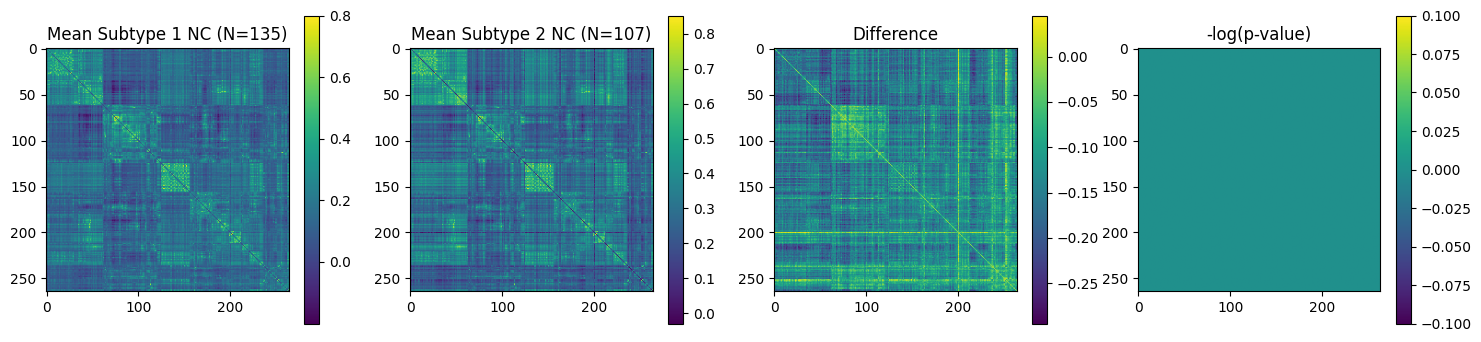

In [54]:
import matplotlib.pyplot as plt
import scipy.stats as stats

im1 = remap(vec2mat(np.mean(x2, axis=0)))
im2 = remap(vec2mat(np.mean(x3, axis=0)))
diff = im1-im2

# Get t distribution
n = x3.shape[0]
m = x3.shape[1]
df = n-2
t = diff*(df/(1-diff**2))**0.5
t[t < 0] = -t[t < 0]
# Convert to 2-sided p value
p = (1-stats.t.cdf(t, df))*2
# Bonferroni correction
p *= m
p[p > 1] = 1
p[p < 1e-5] = 1e-5
p = np.log10(p)

fig, ax = plt.subplots(1,4,figsize=(18,4))
a1 = ax[0].imshow(im1)
a2 = ax[1].imshow(im2)
a3 = ax[2].imshow(diff)
a4 = ax[3].imshow(-p)
fig.colorbar(a1)
fig.colorbar(a2)
fig.colorbar(a3)
fig.colorbar(a4)
ax[0].set_title('Mean Subtype 1 NC (N=135)')
ax[1].set_title('Mean Subtype 2 NC (N=107)')
ax[2].set_title('Difference')
ax[3].set_title('-log(p-value)')
fig.show()

In [73]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

# def rmse(a,b):
#     return torch.mean((a-b)**2)**0.5
  
xx = x5
yy = y5

accs = []

class Logistic(nn.Module):
    def __init__(self, dim):
        super(Logistic, self).__init__()
        self.fc = nn.Linear(dim,2).float().cuda()
        
    def reg_loss(self, C):
        return rmse(self.fc.weight, 0)
        
    def forward(self, x):
        return F.softmax(self.fc(x).squeeze(), dim=-1)
    
for _ in range(50):
    a, b = np.sum(yy == 0), np.sum(yy == 1)
    num = 69 #min(a,b)
    g1x, g2x = xx[yy == 0], xx[yy == 1]
    g1idcs = np.random.permutation(g1x.shape[0])[0:num]
    g2idcs = np.random.permutation(g2x.shape[0])[0:num]
    xxx = np.concatenate([g1x[g1idcs], g2x[g2idcs]])
    yyy = np.concatenate([np.zeros(num), np.ones(num)])

    xtr, xt, ytr, yt = train_test_split(xxx, yyy, stratify=yyy, train_size=0.8)
    xtr, xt, ytr = [torch.from_numpy(a).float().cuda() for a in [xtr, xt, ytr]]
    ytr = F.one_hot(ytr.long()).float()

    clf = Logistic(xtr.shape[-1])
    optim = torch.optim.Adam(clf.parameters(), lr=1e-4, weight_decay=1e-3)

    ce = nn.CrossEntropyLoss()

    for epoch in range(1000):
        optim.zero_grad()
        yhat = clf(xtr)
        loss = ce(yhat, ytr)
        loss.backward()
        optim.step()
#         if epoch % 200 == 0:
#             print(f'{float(loss)}')

    yhat = clf(xt)
    yhat = torch.argmax(yhat, axis=-1)
    yhat = yhat.detach().cpu().numpy()
    acc = np.mean(yhat == yt)
    print(acc)
    accs.append(acc)
    
print('---')
print(np.mean(accs))
print(np.std(accs))

0.75
0.7857142857142857
0.7857142857142857
0.7142857142857143
0.8214285714285714
0.8214285714285714
0.75
0.7142857142857143
0.6428571428571429
0.8214285714285714
0.6785714285714286
0.6428571428571429
0.7142857142857143
0.7857142857142857
0.7857142857142857
0.8571428571428571
0.8214285714285714
0.8928571428571429
0.7142857142857143
0.6428571428571429
0.7857142857142857
0.7857142857142857
0.7142857142857143
0.75
0.6785714285714286
0.8214285714285714
0.75
0.9642857142857143
0.8214285714285714
0.75
0.75
0.6428571428571429
0.6428571428571429
0.7142857142857143
0.8571428571428571
0.7142857142857143
0.7142857142857143
0.6785714285714286
0.6071428571428571
0.5714285714285714
0.6428571428571429
0.7857142857142857
0.8214285714285714
0.6071428571428571
0.8214285714285714
0.7857142857142857
0.8571428571428571
0.7142857142857143
0.75
0.8928571428571429
---
0.7507142857142857
0.08252705184189173


In [41]:
import umap

reducer = umap.UMAP()
emb = reducer.fit_transform(x5)

print(emb.shape)

(441, 2)


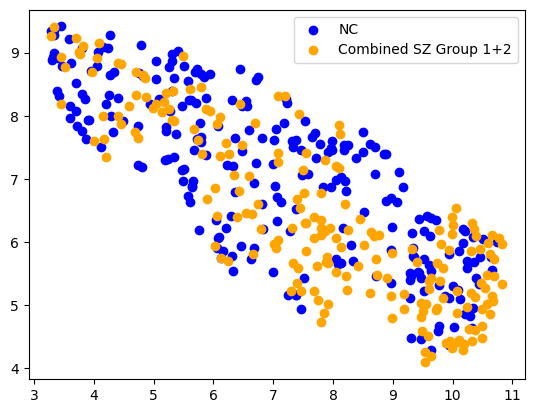

In [42]:
import matplotlib.pyplot as plt

color = iter(['blue', 'orange', 'green'])

# other = np.all([y != 0, y != 6], axis=0)
# plt.scatter(emb[other, 0], emb[other, 1], c=next(color), alpha=0.1, label='Other')

for c,lab in zip([0, 1], ['NC', 'Combined SZ Group 1+2']):
    plt.scatter(emb[y5 == c,0], emb[y5 == c,1], c=next(color), label=lab)    
    
plt.legend()
plt.show()

In [15]:
other.shape

(1244,)